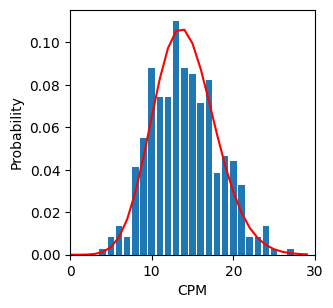

In [3]:
#!/usr/bin/env python3

# Import packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# The name of the file containing the data.
# The data is obtained from a Geiger counter (nell'esempio .csv a lezione).
# The file must reside in the folder where the interpreter runs.
# On Pyzo, remember to right-click the shell area and select "Change
# current directory to editor file path".
datafile = "./coding_elements/1_05-10-2022/20221003_23_10_00.csv"
# Load the file as a table using pandas.
data = pd.read_csv(datafile, skiprows=1)
# Extract the column named "CPM" (counts per minute) from the table.
cpm = data["CPM"].values

# Calculate the histogram of the data, using numpy.
# The output contains the number of times a given number of counts happened.
number, counts = np.histogram(cpm, range=(0,30), bins=30, density=True)
# Mean of the counts per minute.
nbar = cpm.mean()
# Total number of counts.
number_tot = number.sum()
# Renormalize the counts in the histogram to the total number of counts,
# so that it can be compared to a probability distribution function (PDF),
# which is normalized to unity.
experiment = number / number_tot
# The appropriate PDF to compare with the data, which is a Poisson process.
def poisson(l,k):
    r = np.power(l,k) * np.exp(-l) / np.math.factorial(int(k))
    return r
# The prediction for the given number of counts.
theory = np.array([poisson(nbar, n) for n in counts[:-1]])

# Initialize a figure.
# The figure might open in a new window, depending on the matplotlib settings.
# Matplotlib settings are written in the file "matplotlibrc":
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
plt.figure(figsize=(3.5,3.5), frameon=True)
plt.axes([0.2,0.2,0.7,0.7])
# Plot the histogram of the data recorded by the Geiger counter.
plt.bar(counts[:-1], experiment)
# Plot the curve with the theoretical prediction.
plt.plot(counts[:-1], theory, "-r")
# Set the limits on the x axis.
plt.xlim([0,30])
# Set the labels.
plt.xlabel(r"CPM")
plt.ylabel(r"Probability")
# Save the figure as a PNG file with a given resolution.
plt.savefig("counts.png", dpi=300)
np.std()

plt.show()




#in questa lezione, dunque, si è entrati in contatto con i comandi di plot di dati sperimentali per realizzare
#un istogramma e una funzione di poisson

#RIASSUNTO:
#per leggere un file tramite pandas, usare la funzione: pd.read_csv(datafile), al posto di csv estensione
#per estrarre una colonna usare la funzione data[""].values, tra "" il nome della colonna da cui estrarre i dati
#per calcolare la media di un array di valori, usare nomearray.mean()
#per plottare un istogramma, plt.bar
#per salvare con una risoluzione data, usare dpi=300 nel comando savefig
#plt.xlim([])
